# Tennis

---

In this notebook, we use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

## 1. Start the environment

We begin by importing some necessary packages.  

In [1]:
from unityagents import UnityEnvironment
import torch
import numpy as np
import matplotlib.pyplot as plt

import rl_lib
from rl_lib.replay import ReplayBuffer
from rl_lib.agent import DDPGAgent
from rl_lib.training import train_ddpg
from rl_lib.multi_agent import MultiAgent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# get information about the environment

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


## 2. Train the agent

### 2.1 DDPG algorithm

In the next cells, we train an agent using the DDPG algorithm.

#### 2.1 No batch normalization 

In [5]:
# set-up replay buffer
ReplayBufferInput = {
    "action_size": action_size,  # dimension of each action
    "buffer_size": int(1e5),  # replay buffer size
    "batch_size": 256,  # minibatch size
    "random_seed": 0,
}
replay_buffers = list()
for i in range(num_agents):
    replay_buffers.append(ReplayBuffer(**ReplayBufferInput))

In [6]:
# set-up the agent 
AgentInput = {
    "state_size": state_size, # dimension of each state
    "action_size": action_size, # dimension of each action
    "agent_id": num_agents, # unique ID of agents
    "seed": 0, # random seed
    "nr_agents": num_agents, # number of agents
    "gamma": 0.99, # discount factor
    "tau": 1e-3, # for soft update of target parameters
    "learning_rate_actor": 1e-4, # learning rate actor network
    "learning_rate_critic": 1e-4, # learning rate critic network
    "weight_decay_critic": 0, # weight decay for critic
    "update_n_times": 3, # sequential batch update
    "normalize_batch_first_layers": False
}

agents = list()
for i in range(num_agents):
    AgentInput["agent_id"] = i
    agents.append(DDPGAgent(**AgentInput))
    
multi_agents_no_batch_normalization = MultiAgent(num_agents, agents, replay_buffers)

In [7]:
Settings = {
    "n_episodes": 4000, # maximum number of training episodes
    "max_t": 200000, # maximum number of timesteps per episode
    "min_avg_score": 0.5, # minimum average score over 100 episodes that the agent must achieve to consider the task fulfilled
    "continue_learning": True, # if true, the agent continues to learn after reaching min_avg_score until reaching n_episodes
    "filename": "DDPG", #  name for the file that contains the trained network parameters
}

# start training
scores = train_ddpg(env, brain_name, multi_agents_no_batch_normalization, **Settings)

Episode 100	Average Max Score: 0.006900
Episode 200	Average Max Score: 0.015700
Episode 300	Average Max Score: 0.019200
Episode 400	Average Max Score: 0.020400
Episode 500	Average Max Score: 0.024500
Episode 600	Average Max Score: 0.027100
Episode 700	Average Max Score: 0.029800
Episode 800	Average Max Score: 0.034700
Episode 900	Average Max Score: 0.043200
Episode 1000	Average Max Score: 0.031000
Episode 1100	Average Max Score: 0.030300
Episode 1200	Average Max Score: 0.038000
Episode 1300	Average Max Score: 0.058000
Episode 1400	Average Max Score: 0.075000
Episode 1500	Average Max Score: 0.088800
Episode 1600	Average Max Score: 0.098500
Episode 1700	Average Max Score: 0.072200
Episode 1800	Average Max Score: 0.106600
Episode 1900	Average Max Score: 0.094900
Episode 2000	Average Max Score: 0.088300
Episode 2100	Average Max Score: 0.094600
Episode 2200	Average Max Score: 0.076400
Episode 2300	Average Max Score: 0.112400
Episode 2400	Average Max Score: 0.118100
Episode 2500	Average Max 

#### 2.1 Use batch normalization layers

In [8]:
# set-up replay buffer
ReplayBufferInput = {
    "action_size": action_size,  # dimension of each action
    "buffer_size": int(1e5),  # replay buffer size
    "batch_size": 256,  # minibatch size
    "random_seed": 0,
}
replay_buffers = list()
for i in range(num_agents):
    replay_buffers.append(ReplayBuffer(**ReplayBufferInput))

In [9]:
# set-up the agent 
AgentInput = {
    "state_size": state_size, # dimension of each state
    "action_size": action_size, # dimension of each action
    "agent_id": num_agents, # unique ID of agents
    "seed": 0, # random seed
    "nr_agents": num_agents, # number of agents
    "gamma": 0.99, # discount factor
    "tau": 1e-3, # for soft update of target parameters
    "learning_rate_actor": 1e-4, # learning rate actor network
    "learning_rate_critic": 1e-4, # learning rate critic network
    "weight_decay_critic": 0, # weight decay for critic
    "update_n_times": 3, # sequential batch update
    "normalize_batch_first_layers": True
}

agents = list()
for i in range(num_agents):
    AgentInput["agent_id"] = i
    agents.append(DDPGAgent(**AgentInput))
    
multi_agents_batch_normalization = MultiAgent(num_agents, agents, replay_buffers)

In [10]:
Settings = {
    "n_episodes": 4000, # maximum number of training episodes
    "max_t": 200000, # maximum number of timesteps per episode
    "min_avg_score": 0.5, # minimum average score over 100 episodes that the agent must achieve to consider the task fulfilled
    "continue_learning": True, # if true, the agent continues to learn after reaching min_avg_score until reaching n_episodes
    "filename": "DDPGBatchNorm_", #  name for the file that contains the trained network parameters
}

# start training
scores_batch_normalization = train_ddpg(env, brain_name, multi_agents_batch_normalization, **Settings)

Episode 100	Average Max Score: 0.007600
Episode 200	Average Max Score: 0.010800
Episode 300	Average Max Score: 0.002900
Episode 400	Average Max Score: 0.005500
Episode 500	Average Max Score: 0.011800
Episode 600	Average Max Score: 0.012700
Episode 700	Average Max Score: 0.026200
Episode 800	Average Max Score: 0.029500
Episode 900	Average Max Score: 0.057800
Episode 1000	Average Max Score: 0.066400
Episode 1100	Average Max Score: 0.085300
Episode 1200	Average Max Score: 0.084800
Episode 1300	Average Max Score: 0.109100
Episode 1400	Average Max Score: 0.115000
Episode 1500	Average Max Score: 0.137500
Episode 1600	Average Max Score: 0.196200
Episode 1700	Average Max Score: 0.337700
Episode 1800	Average Max Score: 0.388300
Episode 1869	Average Max Score: 0.500900
Environment solved in 1769 episodes!	Average Max Score: 0.500900
Episode 1900	Average Max Score: 0.456800
Episode 2000	Average Max Score: 0.515900
Episode 2100	Average Max Score: 0.510300
Episode 2200	Average Max Score: 0.329300
E

## 3. Visualize results

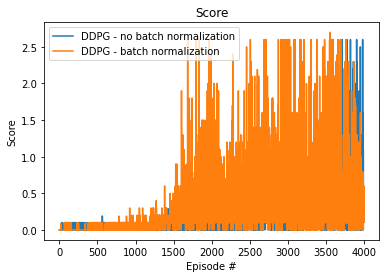

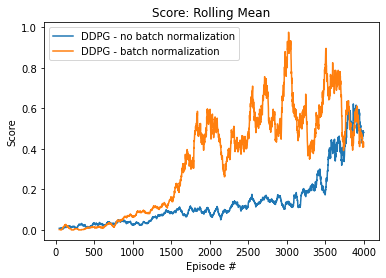

In [11]:
import pandas as pd

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
ddpg_plot, = ax.plot(np.arange(len(scores)), scores)
ddpg_plot.set_label('DDPG - no batch normalization')
ddpg_plot, = ax.plot(np.arange(len(scores_batch_normalization)), scores_batch_normalization)
ddpg_plot.set_label('DDPG - batch normalization')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Score')
ax.legend()


# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
ddpg_plot, = ax.plot(pd.DataFrame(scores).rolling(50).mean())
ddpg_plot.set_label('DDPG - no batch normalization')
ddpg_plot, = ax.plot(pd.DataFrame(scores_batch_normalization).rolling(50).mean())
ddpg_plot.set_label('DDPG - batch normalization')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Score: Rolling Mean')
ax.legend()


In [15]:
def visualize_agent(agents, num_agents, env, env_info):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations               # get the current state
    score = np.zeros(num_agents)                       # initialize the score
    while True:
        action = agents.act(state, add_noise=False, clip=True)  # select an action
        env_info = env.step(action)[brain_name]                # send the action to the environment
        next_state = env_info.vector_observations              # get the next state
        reward = env_info.rewards                              # get the reward
        done = env_info.local_done                             # see if episode has finished
        score += reward                                        # update the score
        state = next_state                                     # roll over the state to next time step
        if np.any(done):                                       # exit loop if episode finished
            break

    print("Score: {}".format(score))

In [16]:
# see the agent acting in the environment
for i in range(num_agents):
    multi_agents_batch_normalization.agents[i].actor_network_local.load_state_dict(
        torch.load("DDPGmin_score_achieved_" + str(i) + "_actor.pth"))

visualize_agent(multi_agents_batch_normalization, num_agents, env, env_info)

Score: [2.60000004 2.60000004]


When finished, you can close the environment.

In [17]:
env.close()